# Analyses of session part clusters


In [76]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
import pandas as pd
from one.api import ONE
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

# --Machine learning and statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans
import umap
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//4_analyses/4_Clustering/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from clustering_functions import revert_to_original, get_ballistic, get_no_resp

# one = ONE(base_url='https://alyx.internationalbrainlab.org')
one = ONE(mode='remote')

## Get data

In [77]:
# Full file path for dumping
file_path = os.path.join('/home/ines/repositories/representation_learning_variability/Exported figures/COSYNE25/')
file_path = os.path.join('/home/ines/repositories/representation_learning_variability/Exported figures/')

# DATA used for COSYNE: states_trial_type_14oct2024

In [79]:
# Load trial clsuters
results_path = '/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/'
trials_filename = str(results_path + 'cluster_per_trial01-09-2025')
old_trial_clusters = pd.read_parquet(trials_filename, engine='pyarrow')
# mouse_filename = str(results_path + 'cluster_per_mouse01-09-2025')
# old_mouse_clusters = pd.read_parquet(mouse_filename, engine='pyarrow')


# Load trial clsuters
results_path = '/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/'
trials_filename = str(results_path + 'cluster_per_trial_part_info03-12-2025')
trial_clusters = pd.read_parquet(trials_filename, engine='pyarrow')
parts_filename = str(results_path + 'cluster_per_session_part03-12-2025')
parts_clusters = pd.read_parquet(parts_filename, engine='pyarrow')


In [80]:
old_trial_clusters = old_trial_clusters.rename(columns={"sample": "old_sample"})
trial_clusters = trial_clusters.merge(old_trial_clusters[['old_sample', 'mouse_name', 
                                                          'perseverence', 'wsls', 'ballistic']].drop_duplicates(), on=['old_sample', 'mouse_name'])

## Plot parts cluster features

In [81]:
mean_cluster_parts = pd.DataFrame(parts_clusters.groupby(['part_cluster', 'cluster'])['relative_frequency'].mean()).reset_index()


In [83]:

plt_vars = ['0', '1', '2', '3', '4', '5', '6'] 

unique_clusters = [0, 1, 2, 3, 4, 5, 6]
new_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}

mapping = {
    cluster: label
    for cluster, label in zip(unique_clusters, plt_vars)
}
mapping
replace_func = np.vectorize(mapping.get)

replace_func = np.vectorize(new_dict.get)
mean_cluster_parts['new_clusters'] = mean_cluster_parts['cluster'].copy()
mean_cluster_parts['new_clusters'] = replace_func(mean_cluster_parts['cluster'])


In [84]:
mean_cluster_parts['label'] = mean_cluster_parts['cluster'].copy()
mean_cluster_parts['label'] = replace_func(mean_cluster_parts['label'])

mean_cluster_parts.sort_values(by='label')

# Custom order (array) for the 'name' column
custom_order = ['Right ballistic','Accurate, long pre-quiescence','Long reaction', 'Left ballistic',
            'Left non-ballistic','Right non-ballistic'] 
custom_order = ['0', '1', '2', '3', '4', '5', '6']

# Convert the 'name' column to a categorical type with the specified order
mean_cluster_parts['label'] = pd.Categorical(mean_cluster_parts['label'], categories=custom_order, ordered=True)


In [85]:

plt.rcParams.update({'font.size': 16})

# plot star plot for comparison 
fig = go.Figure() 
fig.add_trace(go.Scatterpolar( 
      r=pd.Series(mean_cluster_parts.sort_values(by='new_clusters').loc[mean_cluster_parts['part_cluster']==0, 'relative_frequency'].values), 
      theta=plt_vars, 
      fill='toself', 
      name='Part cluster 0' 
)) 
fig.add_trace(go.Scatterpolar( 
      r=pd.Series(mean_cluster_parts.sort_values(by='new_clusters').loc[mean_cluster_parts['part_cluster']==1, 'relative_frequency'].values), 
      theta=plt_vars, 
      fill='toself', 
      name='Part cluster 1'
)) 

fig.add_trace(go.Scatterpolar( 
      r=pd.Series(mean_cluster_parts.sort_values(by='new_clusters').loc[mean_cluster_parts['part_cluster']==2, 'relative_frequency'].values), 
      theta=plt_vars, 
      fill='toself', 
      name='Part cluster 2'
)) 

fig.add_trace(go.Scatterpolar( 
      r=pd.Series(mean_cluster_parts.sort_values(by='new_clusters').loc[mean_cluster_parts['part_cluster']==3, 'relative_frequency'].values), 
      theta=plt_vars, 
      fill='toself', 
      name='Part cluster 3'
)) 
  
fig.add_trace(go.Scatterpolar( 
      r=pd.Series(mean_cluster_parts.sort_values(by='new_clusters').loc[mean_cluster_parts['part_cluster']==4, 'relative_frequency'].values), 
      theta=plt_vars, 
      fill='toself', 
      name='Part cluster 4'
)) 
  
  
fig.update_layout( 
  polar=dict(
        angularaxis=dict(
            tickfont=dict(size=16)  # Set the font size of the theta labels
        ),
    radialaxis=dict( 
      visible=True,
      tickfont=dict(size=16)
          )), 
  
  showlegend=True
)  #     template = 'plotly_dark', 

# plt.savefig(file_path+'star_plots_mice.svg', format="svg")
# fig.write_image(file_path + 'star_plots_mice.svg')

fig.show() 

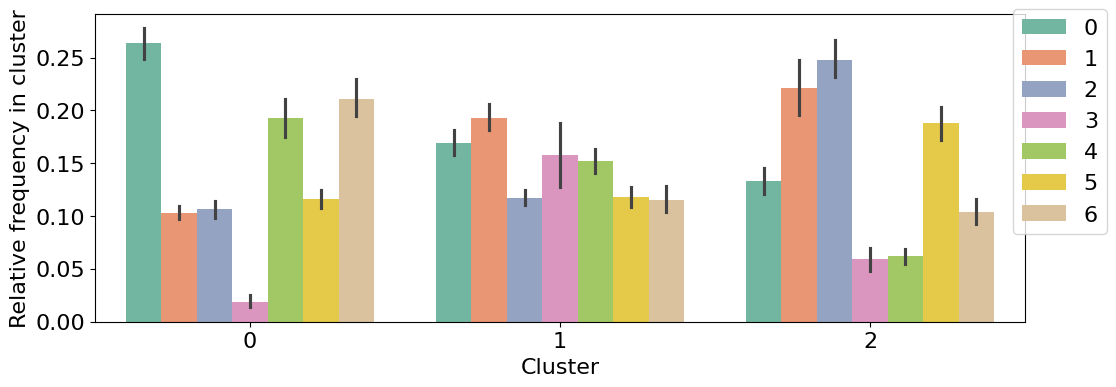

In [86]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='part_cluster', y='relative_frequency', hue='cluster', data=parts_clusters, palette='Set2')
plt.ylabel('Relative frequency in cluster')
plt.xlabel('Cluster')
plt.legend(bbox_to_anchor=(1.1, 1.05))

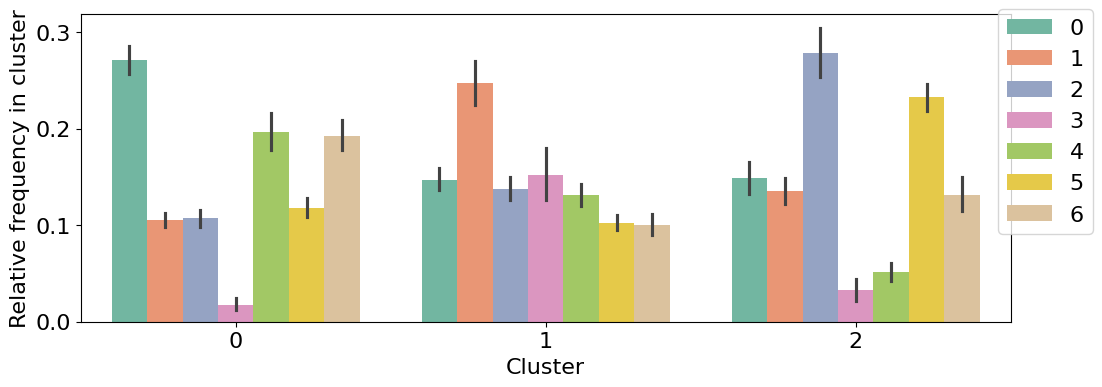

In [64]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='part_cluster', y='relative_frequency', hue='cluster', data=parts_clusters, palette='Set2')
plt.ylabel('Relative frequency in cluster')
plt.xlabel('Cluster')
plt.legend(bbox_to_anchor=(1.1, 1.05))


Text(0.5, 0, 'Part cluster')

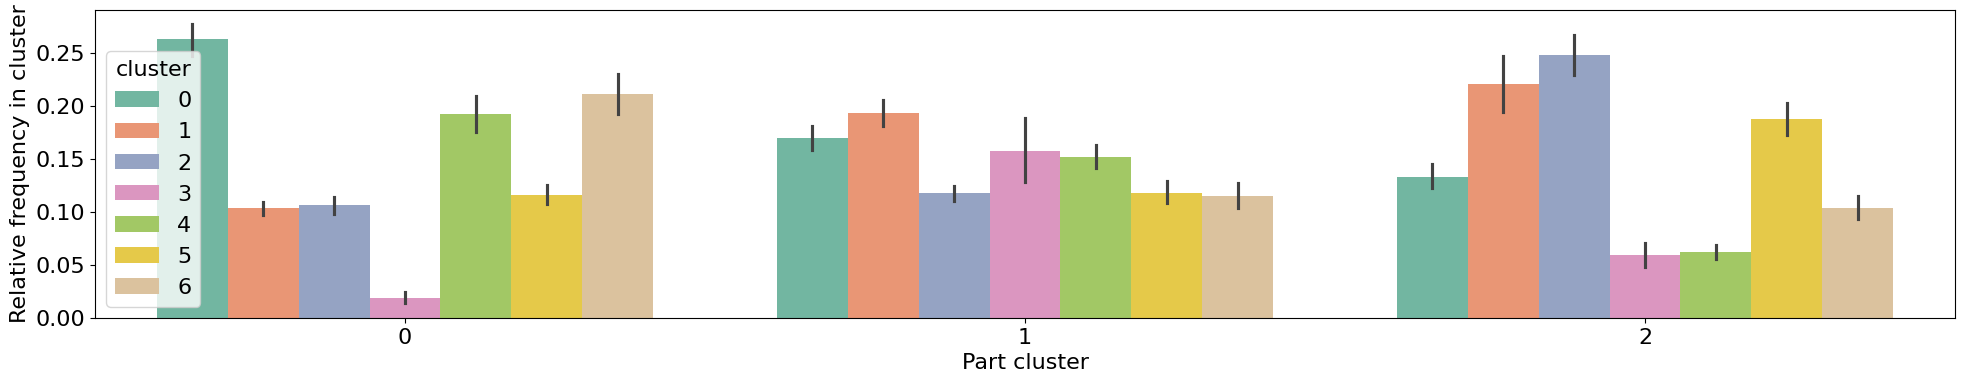

In [13]:
fig, ax = plt.subplots(figsize=(24, 4))
sns.barplot(x='part_cluster', y='relative_frequency', hue='cluster', data=parts_clusters, palette='Set2')
plt.ylabel('Relative frequency in cluster')
plt.xlabel('Part cluster')

## Merge trial info and mouse clusters

In [65]:
part_trials_df = parts_clusters.merge(trial_clusters[['mouse_name', 'sample', 'reaction', 'response', 
                                                      'elongation', 'feedback', 'ballistic', 'wsls', 'perseverence',
                                                      'choice', 'side', 'contrast', 'block']], on=['mouse_name', 'sample'])
# new_df = pd.DataFrame(new_df.groupby(['mouse_name', 'mouse_cluster'])['reaction', 'response', 'elongation', 'correct', 'ballistic'].mean()).reset_index()

/tmp/ipykernel_48815/4040870409.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/4040870409.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



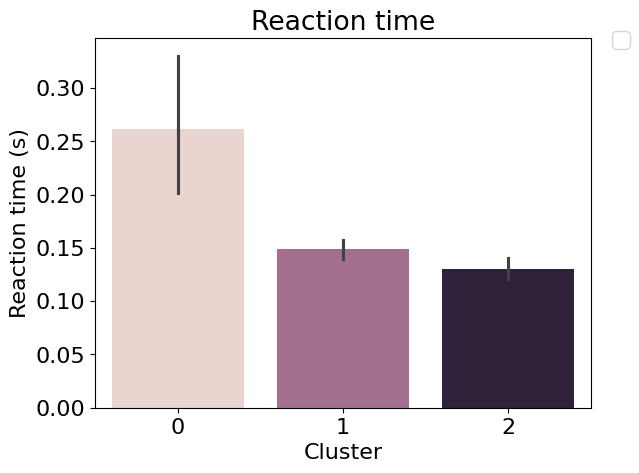

/tmp/ipykernel_48815/4040870409.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/4040870409.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



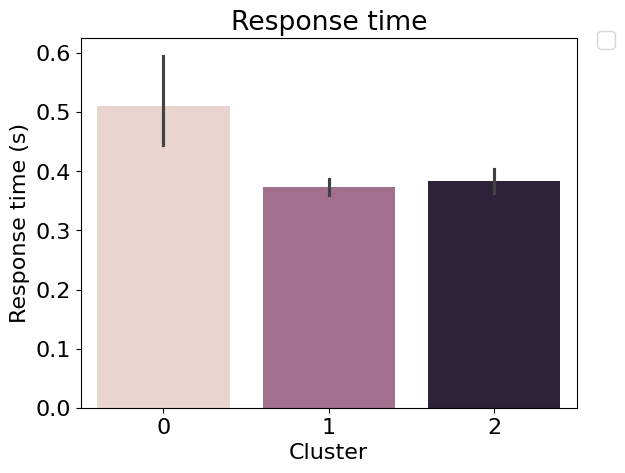

/tmp/ipykernel_48815/4040870409.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/4040870409.py:22: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



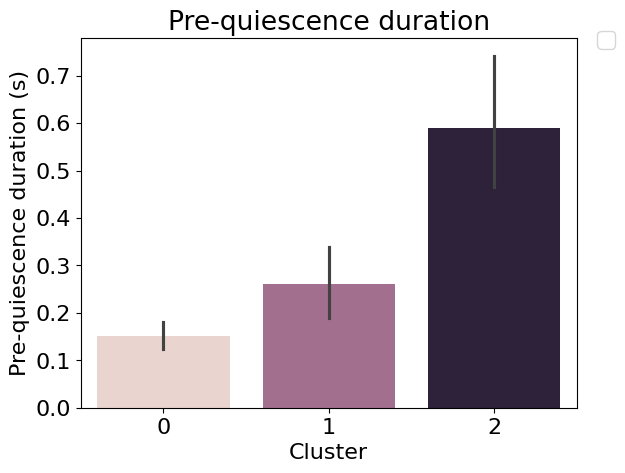

In [66]:
new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['reaction', 'response', 
                                                                                          'elongation']].median()).reset_index()
sns.barplot(x='part_cluster', y='reaction', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Reaction time')
plt.ylabel('Reaction time (s)')
plt.xlabel('Cluster')
plt.savefig(file_path+'reaction_mouse.svg', format="svg")

plt.show()

sns.barplot(x='part_cluster', y='response', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Response time')
plt.ylabel('Response time (s)')
plt.savefig(file_path+'response_mouse.svg', format="svg")

plt.xlabel('Cluster')
plt.show()

sns.barplot(x='part_cluster', y='elongation', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Pre-quiescence duration')
plt.ylabel('Pre-quiescence duration (s)')
plt.savefig(file_path+'elongation_mouse.svg', format="svg")

plt.xlabel('Cluster')
plt.show()


/tmp/ipykernel_48815/3456644592.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/3456644592.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



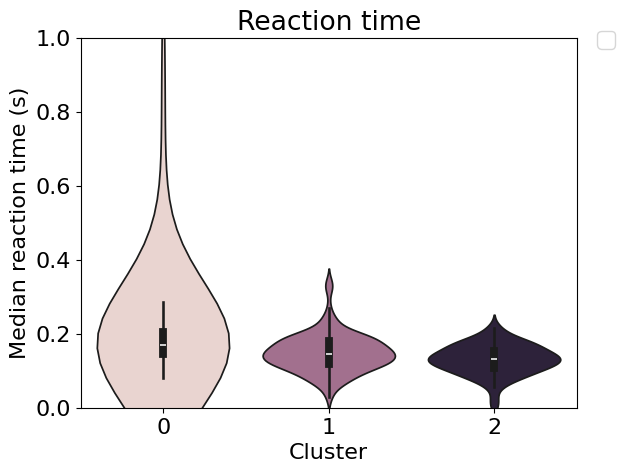

/tmp/ipykernel_48815/3456644592.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/3456644592.py:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



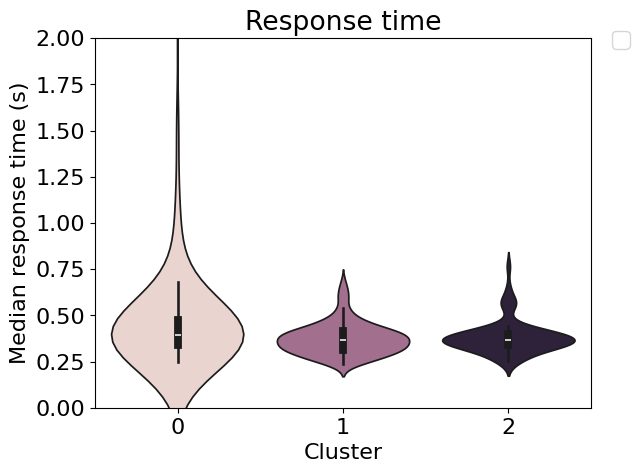

/tmp/ipykernel_48815/3456644592.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/3456644592.py:26: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



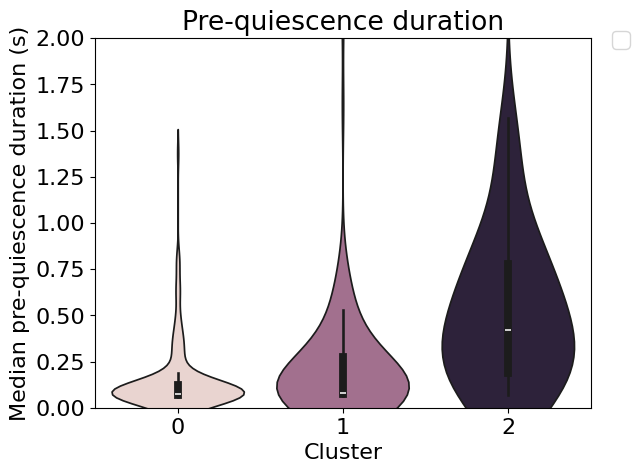

In [68]:
# part_trials_df = trial_clusters.merge(parts_clusters[['mouse_name', 'part_cluster']])

new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['reaction', 'response', 
                                                                                          'elongation']].median()).reset_index()
sns.violinplot(x='part_cluster', y='reaction', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylim([0, 1])
plt.title('Reaction time')
plt.ylabel('Median reaction time (s)')
plt.xlabel('Cluster')
plt.savefig(file_path+'reaction_mouse.svg', format="svg")

plt.show()

sns.violinplot(x='part_cluster', y='response', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Response time')
plt.ylabel('Median response time (s)')
plt.ylim([0, 2])
plt.savefig(file_path+'response_mouse.svg', format="svg")

plt.xlabel('Cluster')
plt.show()

sns.violinplot(x='part_cluster', y='elongation', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Pre-quiescence duration')
plt.ylabel('Median pre-quiescence duration (s)')
plt.savefig(file_path+'elongation_mouse.svg', format="svg")
plt.ylim([0, 2])
plt.xlabel('Cluster')
plt.show()


/tmp/ipykernel_48815/3309799680.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/3309799680.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



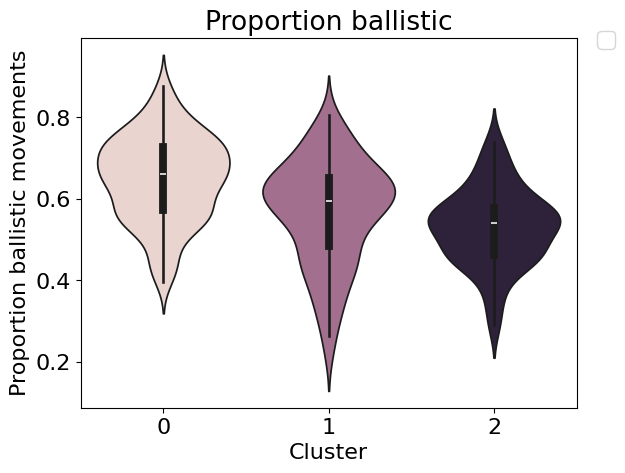

/tmp/ipykernel_48815/3309799680.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_48815/3309799680.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



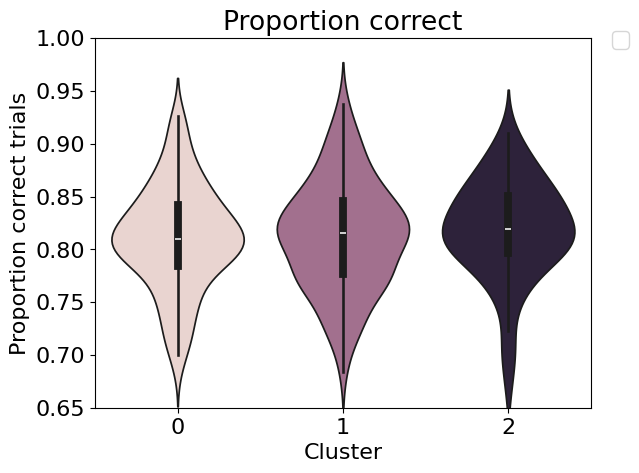

In [69]:

new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['feedback', 'ballistic',
                                                                                           'contrast', 'block']].mean()).reset_index()

sns.violinplot(x='part_cluster', y='ballistic', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Proportion ballistic')
plt.ylabel('Proportion ballistic movements')
plt.savefig(file_path+'ballistic_mouse.svg', format="svg")

plt.xlabel('Cluster')
plt.show()

sns.violinplot(x='part_cluster', y='feedback', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylim([.65,1])
plt.title('Proportion correct')
plt.ylabel('Proportion correct trials')
plt.savefig(file_path+'correct_mouse.svg', format="svg")

plt.xlabel('Cluster')
# plt.ylim([.5, 1])
plt.show()

# sns.barplot(x='part_cluster', y='contrast', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.title('Contrast')
# plt.ylabel('Contrast')
# # plt.savefig(file_path+'correct_mouse.svg', format="svg")

# plt.xlabel('Cluster')
# plt.ylim([.5, 1])
# plt.show()

# sns.violinplot(x='part_cluster', y='block', data=new_df, palette=sns.cubehelix_palette(3,as_cmap=False))
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.title('Block probability')
# plt.ylabel('lock probability')
# # plt.savefig(file_path+'ballistic_mouse.svg', format="svg")
# plt.xlabel('Cluster')
# plt.show()



## Plot states per cluster

In [70]:
part_trials_df = parts_clusters.merge(trial_clusters, on=['mouse_name', 'sample', 'cluster'])

In [71]:
from matplotlib.colors import LinearSegmentedColormap

# Load color palette
colors = sns.cubehelix_palette(3,as_cmap=False)
colors = sns.color_palette("viridis", 3)

# Function to create a colormap from a base color (white to color)
def create_shaded_cmap(base_color, name='custom_cmap'):
    cdict = {
        'red':   [[0.0, 1.0, 1.0], [1.0, base_color[0], base_color[0]]],
        'green': [[0.0, 1.0, 1.0], [1.0, base_color[1], base_color[1]]],
        'blue':  [[0.0, 1.0, 1.0], [1.0, base_color[2], base_color[2]]]
    }
    return LinearSegmentedColormap(name, cdict)

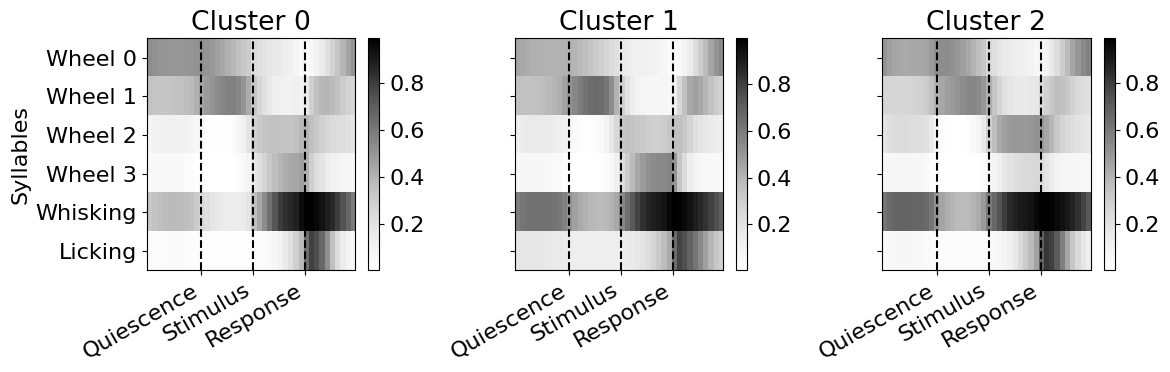

In [73]:
wheel_mapping = {0:0, 1:1, 2:2, 3:3,
                 4:0, 5:1, 6:2, 7:3,
                 8:0, 9:1, 10:2, 11:3,
                 12:0, 13:1, 14:2, 15:3}
whisker_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:1, 5:1, 6:1, 7:1,
                 8:0, 9:0, 10:0, 11:0,
                 12:1, 13:1, 14:1, 15:1}
lick_mapping = {0:0, 1:0, 2:0, 3:0,
                 4:0, 5:0, 6:0, 7:0,
                 8:1, 9:1, 10:1, 11:1,
                 12:1, 13:1, 14:1, 15:1}
replace_wheel = np.vectorize(wheel_mapping.get)
# wheel_states = replace_wheel(use_sequences)
replace_whisker = np.vectorize(whisker_mapping.get)
# whisker_states = replace_whisker(use_sequences)
replace_lick = np.vectorize(lick_mapping.get)
# lick_states = replace_lick(use_sequences)
epoch_to_analyse = ['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']

color = sns.color_palette("Set2", 7)
fig, axs = plt.subplots(1, len(parts_clusters['part_cluster'].unique()), sharex=True, sharey=True, figsize=(12, 4))

for c, cluster in enumerate([0, 1, 2]):
    cluster_data = part_trials_df.loc[part_trials_df['part_cluster']==cluster]
    sequences_choice = np.vstack(cluster_data[epoch_to_analyse].apply(lambda row: np.hstack(row), axis=1))  # Transpose to get the right shape
    use_sequences = sequences_choice[~np.isnan(sequences_choice).any(axis=1)]
    
    replace_whisker = np.vectorize(whisker_mapping.get)
    whisker_states = replace_whisker(use_sequences)
    replace_wheel = np.vectorize(wheel_mapping.get)
    wheel_states = replace_wheel(use_sequences)    
    replace_lick = np.vectorize(lick_mapping.get)
    lick_states = replace_lick(use_sequences)
    
    whisker_count = np.zeros((1, 40))
    lick_count = np.zeros((1, 40))
    wheel_count = np.zeros((4, 40))

    for b, bin in enumerate(range(40)):
        # counts, bins = np.histogram(use_sequences[:, b], range=(0,15), bins=16)
        whisker_count[0, b] = np.sum(whisker_states[:, b]==1)/len(whisker_states[:, b])
        lick_count[0, b] = np.sum(lick_states[:, b]==1)/len(lick_states[:, b])
        wheel_count[0, b] = np.sum(wheel_states[:, b]==1)/len(wheel_states[:, b])
        wheel_count[1, b] = np.sum(wheel_states[:, b]==2)/len(wheel_states[:, b])
        wheel_count[2, b] = np.sum(wheel_states[:, b]==3)/len(wheel_states[:, b])
        wheel_count[3, b] = np.sum(wheel_states[:, b]==0)/len(wheel_states[:, b])
    
    all_stacked = np.vstack([wheel_count, whisker_count, lick_count])
    # all_stacked = np.vstack([wheel_count])

    cmap_value_1 = create_shaded_cmap(colors[c], name='cmap_value_1')
    # image = axs[c].imshow(all_stacked, cmap=cmap_value_1, aspect='auto')
    image = axs[c].imshow(all_stacked, cmap='Greys', aspect='auto')
    fig.colorbar(image, ax=axs[c], location='right', anchor=(0, 0.3))
    axs[c].set_yticks(np.arange(0, 6, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3', 'Whisking', 'Licking'])
    # axs[c].set_yticks(np.arange(0, 4, 1), ['Wheel 0', 'Wheel 1', 'Wheel 2', 'Wheel 3'])
    axs[c].axvline(x=10, color='k', linestyle='--')
    axs[c].axvline(x=20, color='k', linestyle='--')
    axs[c].axvline(x=30, color='k', linestyle='--')

    axs[c].set_xticks(np.arange(10, 31, 10), ['Quiescence', 'Stimulus', 'Response'], rotation=30, ha='right')
    # axs[c].set_xlabel('Time in epoch')
    axs[c].set_title('Cluster ' +str(cluster))
axs[0].set_ylabel('Syllables')
plt.tight_layout()
plt.show()

In [8]:
# Load trial clsuters
results_path = '/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/'
filename = str(results_path + 'entropy03-13-2025')
entropy = pd.read_parquet(filename, engine='pyarrow')

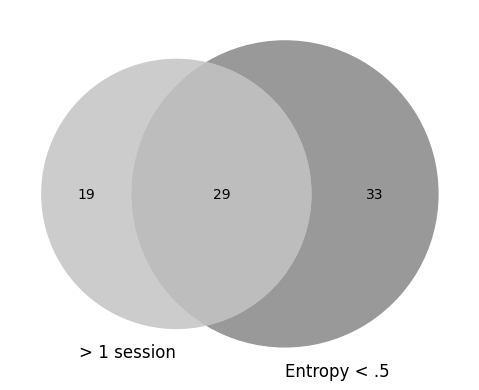

In [9]:
from matplotlib_venn import venn2

set1 = set(list(entropy.loc[(entropy['session_len']>1) & (entropy['variable']=='True'), 'mouse_name']))
set2 = set(list(entropy.loc[(entropy['value']<.3), 'mouse_name']))

venn2([set1, set2], ('> 1 session', 'Entropy < .5'), set_colors=("grey", "black"))

plt.show()

In [74]:
new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['feedback', 'ballistic',
                                                                                           'contrast', 'block']].mean()).reset_index()

new_df = pd.DataFrame(part_trials_df.groupby(['mouse_name', 'part_cluster', 'sample'])[['reaction', 'response', 
                                                                                          'elongation']].median()).reset_index()
data_path =  '/home/ines/repositories/representation_learning_variability/DATA/'
os.chdir(data_path)
learning_df = pd.read_csv('learning_private_one.csv')  
learning_times = learning_df[['subject_nickname', 'training_time']].drop_duplicates()
learning_times = learning_times.rename(columns={"subject_nickname": "mouse_name"}).reset_index()
df = new_df.merge(learning_times, on='mouse_name')

/tmp/ipykernel_48815/2909235519.py:8: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



Text(29.222222222222214, 0.5, 'Mouse cluster entropy')

/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


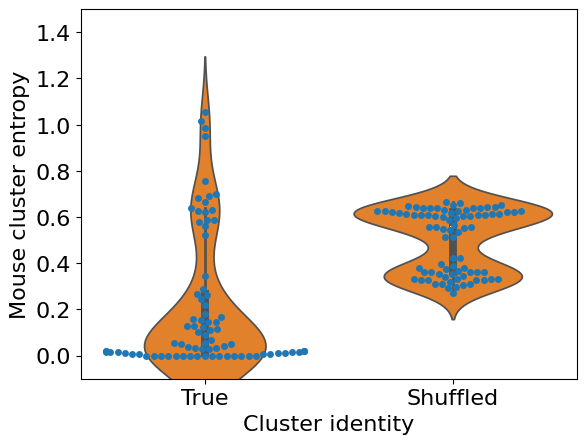

In [25]:
sns.swarmplot(x='variable', y='value', data=entropy)
sns.violinplot(x='variable', y='value', data=entropy)
plt.xlabel('Cluster identity')
plt.ylim([-.1, 1.5])
plt.ylabel('Mouse cluster entropy')

In [47]:
filter_mice = entropy.loc[(entropy['variable']=='True') & (entropy['session_len']>1) & (entropy['value']<.5), 'mouse_name']
# (entropy['session_len']>1) & 

                    sum_sq     df         F    PR(>F)
part_cluster    294.069466    1.0  1.826535  0.177391
Residual      57637.486090  358.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -2.9093 0.1258 -6.4163 0.5978  False
     0      2  -1.7461 0.6064 -6.0531  2.561  False
     1      2   1.1632 0.8095 -3.2553 5.5817  False
---------------------------------------------------


/tmp/ipykernel_48815/3344889086.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




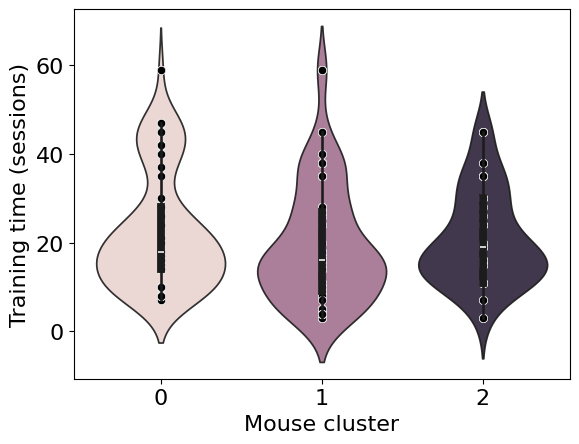

P-value for KW: 0.075
          0         1         2
0  1.000000  0.081524  1.000000
1  0.081524  1.000000  0.445095
2  1.000000  0.445095  1.000000


In [75]:

var_1 = 'training_time ~ part_cluster'
var = 'training_time'
# var = 'elongation'
# var_1 = 'elongation ~ part_cluster'
# Define the model using ordinary least squares (OLS) and fit it
data = df.dropna()
# data = df.loc[df['mouse_name'].isin(filter_mice)].dropna()
# data = pd.DataFrame(df.groupby(['mouse_name', 'part_cluster'])[var].mean()).reset_index().dropna()

model = ols(var_1, data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data[var], groups=data['part_cluster'], alpha=0.05)

print(tukey)
plt.rcParams.update({'font.size': 16})
sns.violinplot(x='part_cluster', y=var, data=data, palette=sns.cubehelix_palette(3,as_cmap=False), alpha=.9)
sns.scatterplot(x='part_cluster', y=var, data=data, color='black')
plt.xticks([0, 1, 2], [0, 1, 2])
# plt.ylim([0, 80])
plt.xlabel('Mouse cluster')
plt.ylabel('Proportion correct')
plt.ylabel('Training time (sessions)')
plt.savefig(file_path+'training_time.svg', format="svg")

plt.show()

group_1 = df.loc[df['part_cluster']==0, var]
group_2 = df.loc[df['part_cluster']==1, var]
group_3 = df.loc[df['part_cluster']==2, var]


stat, p_value = stats.kruskal(group_1, group_2, group_3)
# stat, p_value = stats.kruskal(group_1, group_2)

print(f"P-value for KW: {p_value:.3f}")

posthoc = sp.posthoc_dunn(df.dropna(), val_col=var, group_col='part_cluster', p_adjust='bonferroni')
print(posthoc)


/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/4_Clustering/clustering_functions.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



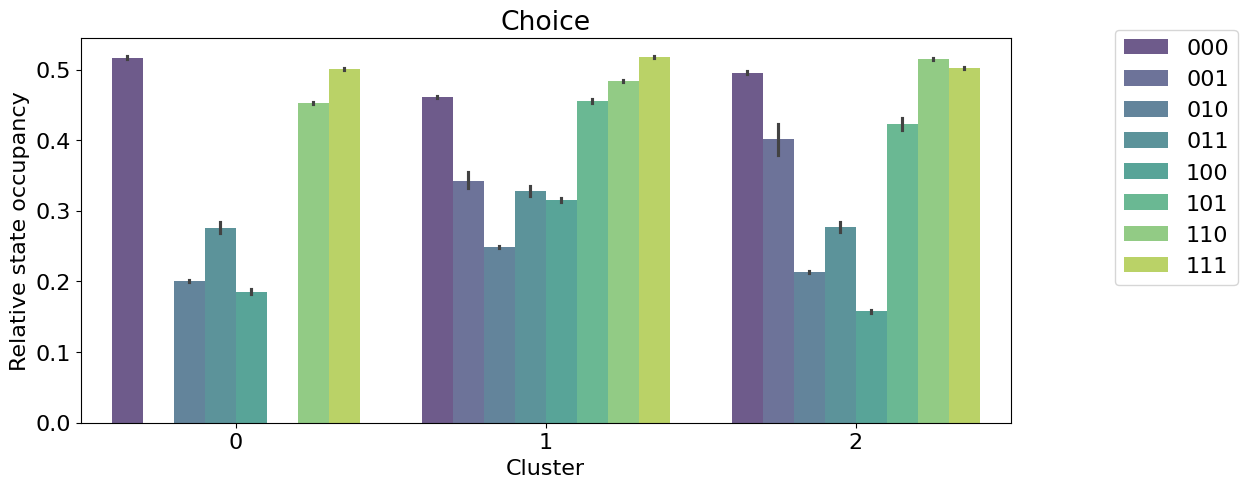

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/4_Clustering/clustering_functions.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



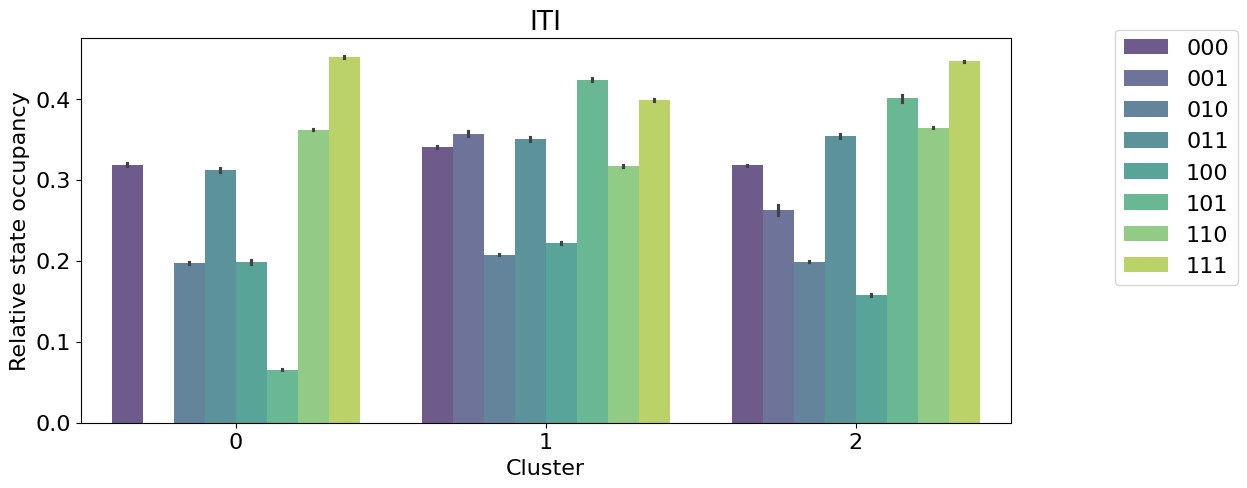

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/4_Clustering/clustering_functions.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



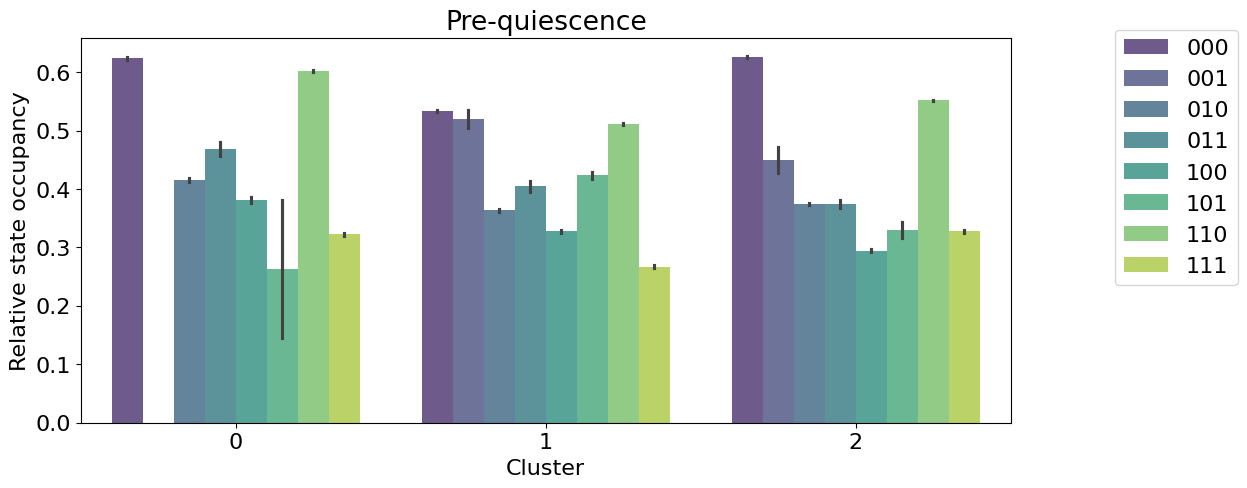

/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/4_Clustering/clustering_functions.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



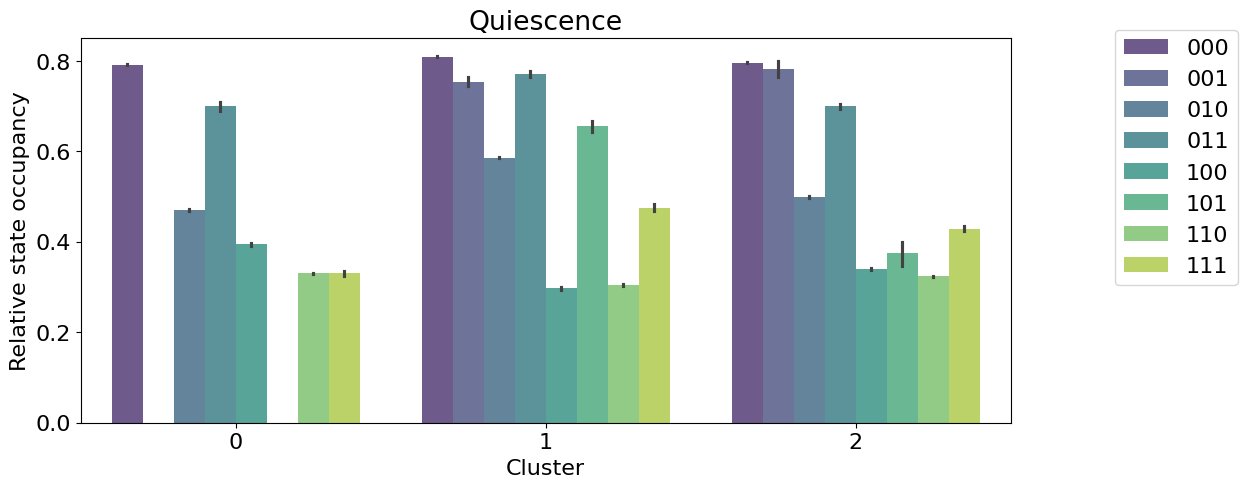

In [95]:
for e, epoch in enumerate(mouse_trials_df['broader_label'].unique()):
    use_data = mouse_trials_df.loc[mouse_trials_df['broader_label']==epoch]
    use_data = revert_to_original(use_data)
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.barplot(hue='original_states', y='relative_frequency', x='mouse_cluster', alpha=0.8,
                hue_order = ['000', '001', '010', '011', '100', '101', '110','111'], data=use_data, palette='viridis')
    plt.xlabel('Cluster')
    plt.ylabel('Relative state occupancy')
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(epoch)
    plt.show()

## Plot ballistic stats per cluster

ValueError: Could not interpret value `ballistic` for `hue`. An entry with this name does not appear in `data`.

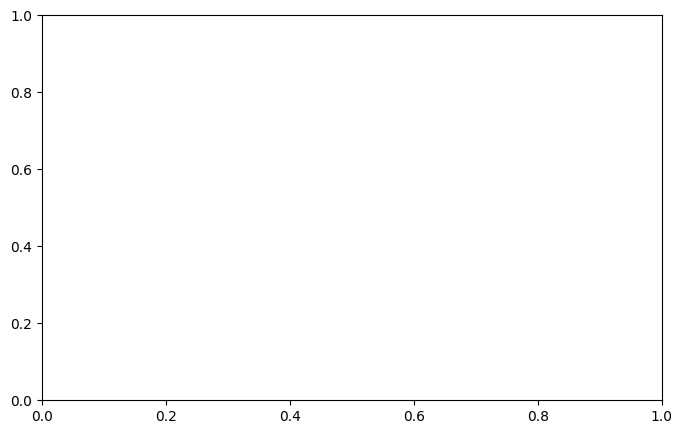

In [ ]:

labels = ['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI']
colors = sns.color_palette('tab10')[0:2]
count['broader_label'] = pd.Categorical(count['broader_label'], categories=labels)
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x='broader_label', y='count', data=count, hue='ballistic')
plt.xlabel('Trial epoch')
plt.ylabel('Relative frequency')
# plt.xticks(rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
# except:

/tmp/ipykernel_42178/4245298614.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['bal_state'] = use_data['identifiable_states'].copy()


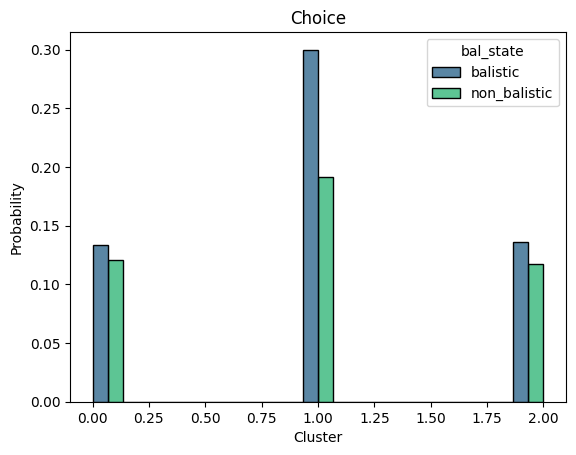

/tmp/ipykernel_42178/4245298614.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['bal_state'] = use_data['identifiable_states'].copy()


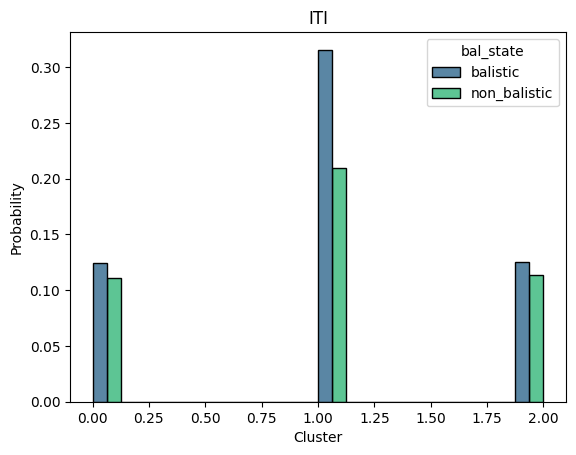

/tmp/ipykernel_42178/4245298614.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['bal_state'] = use_data['identifiable_states'].copy()


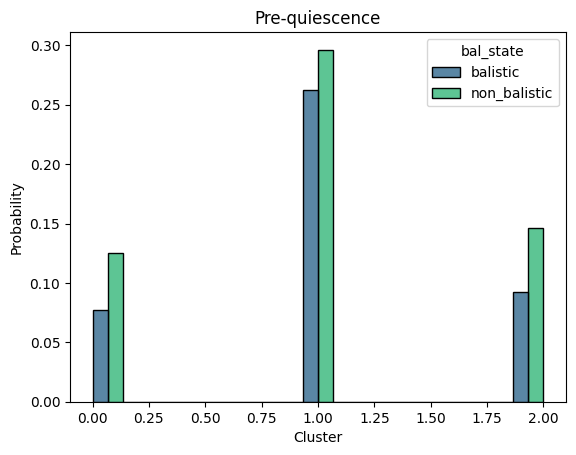

/tmp/ipykernel_42178/4245298614.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['bal_state'] = use_data['identifiable_states'].copy()


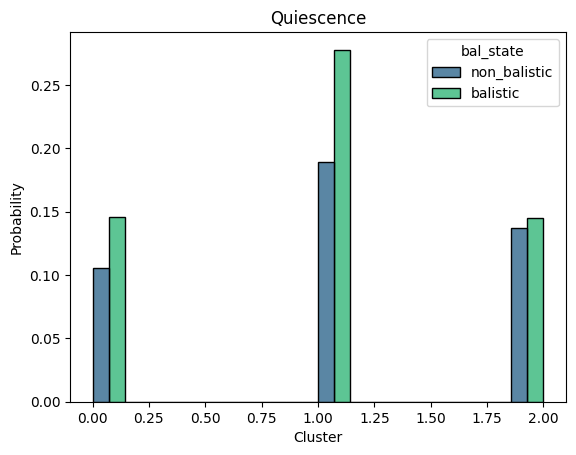

/tmp/ipykernel_42178/4245298614.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['bal_state'] = use_data['identifiable_states'].copy()


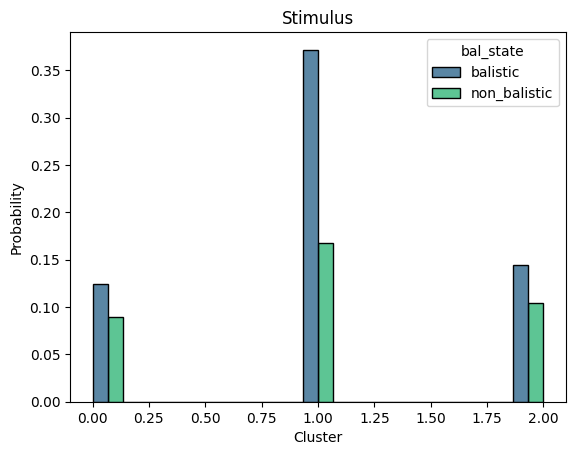

In [ ]:
for e, epoch in enumerate(df_cluster['broader_label'].unique()):
    use_data = df_cluster.loc[df_cluster['broader_label']==epoch]
    use_data = get_ballistic(use_data)
    sns.histplot(hue='bal_state', x='cluster', alpha=0.8,data=use_data, stat='probability', multiple='dodge', palette='viridis')
    plt.xlabel('Cluster')
    # plt.ylabel('Proportion ballistic')
    # plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(epoch)
    plt.show()

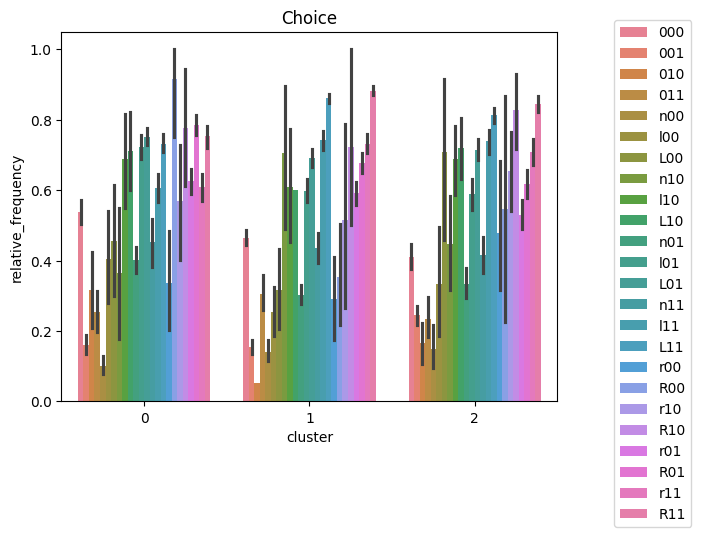

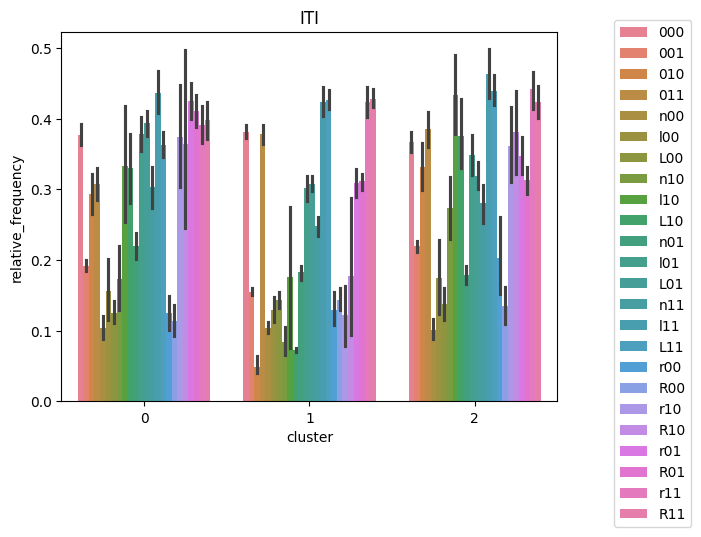

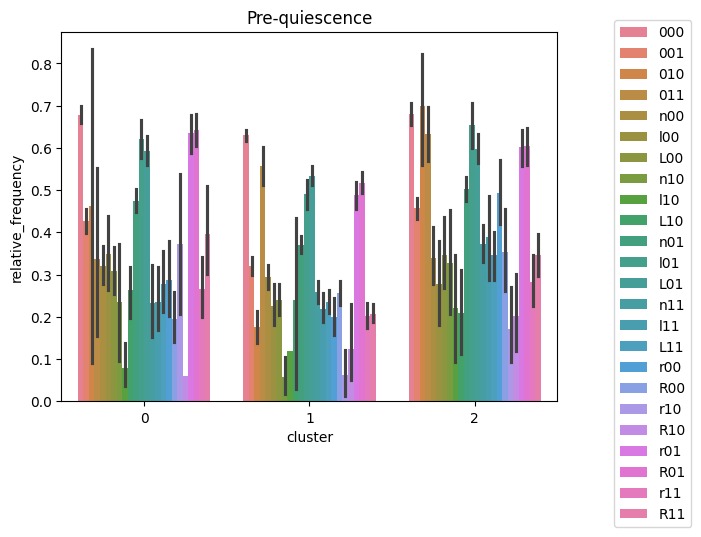

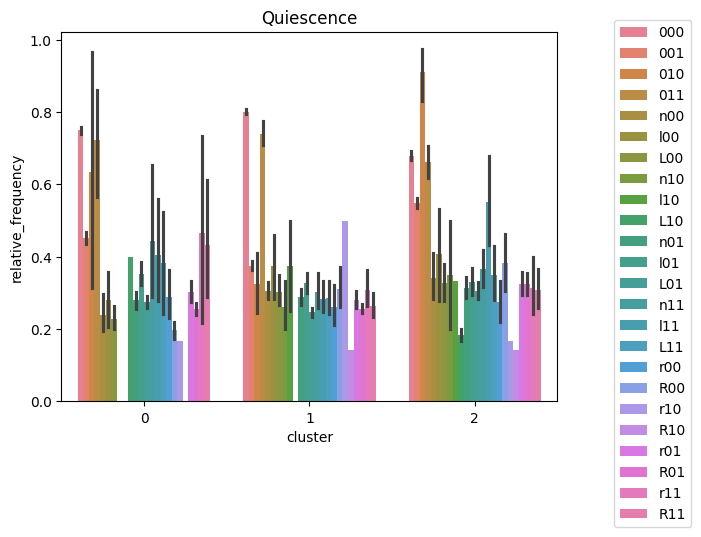

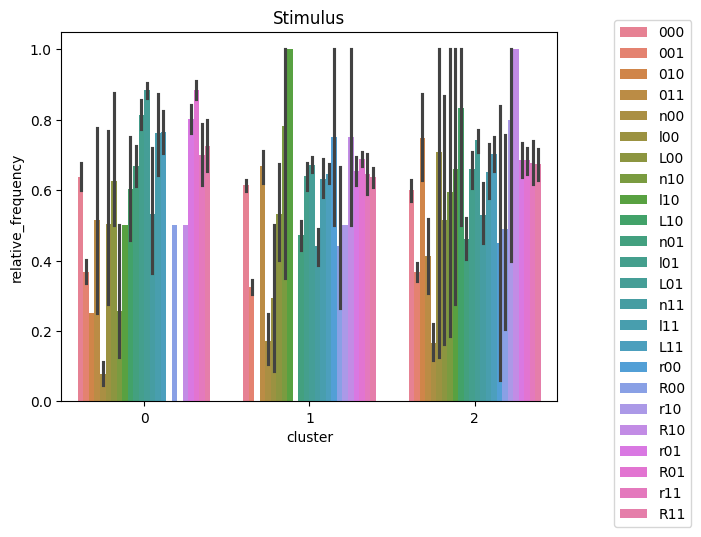

In [ ]:
for e, epoch in enumerate(df_cluster['broader_label'].unique()):
    use_data = df_cluster.loc[df_cluster['broader_label']==epoch]
    sns.barplot(hue='identifiable_states', y='relative_frequency', x='cluster', 
                hue_order = ['000', '001', '010', '011', 'n00', 'l00', 'L00',
                             'n10', 'l10', 'L10', 'n01', 'l01', 'L01', 'n11', 'l11', 'L11',
                             'r00', 'R00', 'r10', 'R10', 'r01', 'R01', 'r11', 'R11'
                             ], data=use_data)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(epoch)
    plt.show()

/tmp/ipykernel_42178/4245298614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['original_states'] = use_data['identifiable_states'].copy()


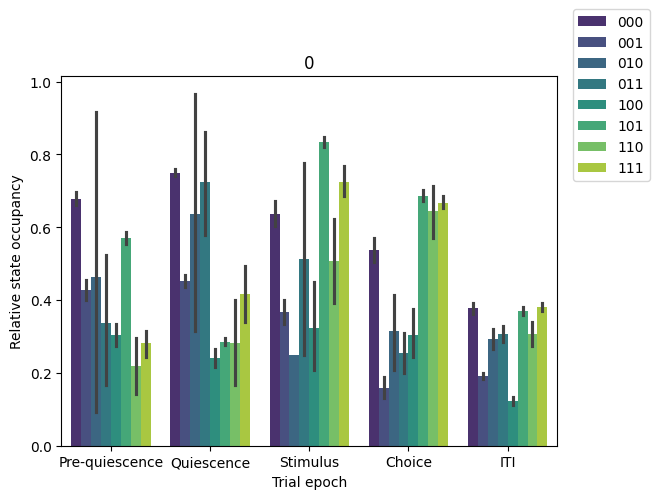

/tmp/ipykernel_42178/4245298614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['original_states'] = use_data['identifiable_states'].copy()


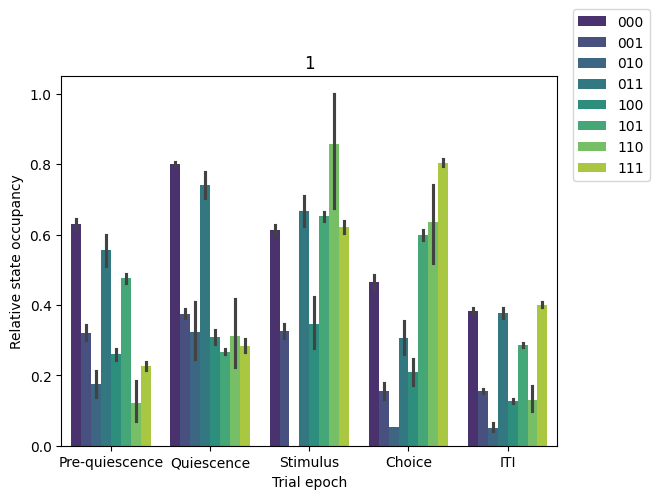

/tmp/ipykernel_42178/4245298614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['original_states'] = use_data['identifiable_states'].copy()


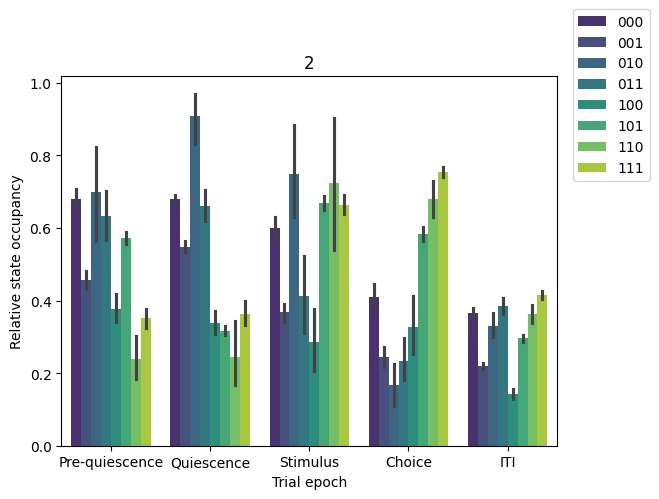

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


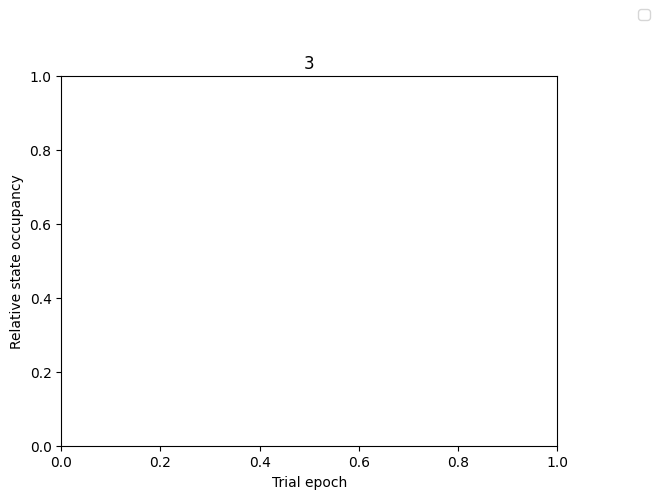

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


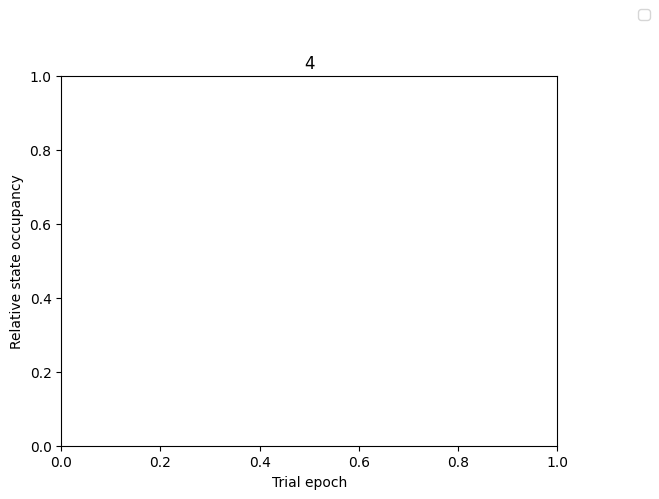

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


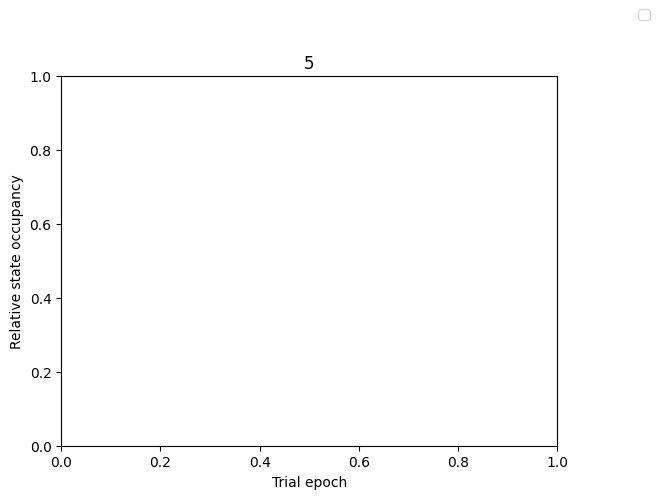

In [ ]:
for c, cluster in enumerate(range(6)):
    use_data = df_cluster.loc[df_cluster['cluster']==cluster]
    use_data = revert_to_original(use_data)
    sns.barplot(x='broader_label', y='relative_frequency', hue='original_states', 
                order=['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI'], 
                hue_order = ['000', '001', '010', '011', '100', '101', '110','111'], data=use_data, palette='viridis')
    plt.xlabel('Trial epoch')
    plt.ylabel('Relative state occupancy')
    plt.legend(bbox_to_anchor=(1.2, 1.2))
    plt.title(cluster)
    plt.show()